In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# First, look for column headers
first_row = session.query(Measure).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fccbe735dd0>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [23]:
# inspector can also be used to examine table names and their respective column names and data types
inspector = inspect(engine)

for tables in inspector.get_table_names():
    print(f"'{tables}' column headers (TYPE):")
    print("    ")
    columns = inspector.get_columns(tables)
    for c in columns:
        print(f'{c["name"]} ({c["type"]})')
    print("----------------")
    print("   ")

'measurement' column headers (TYPE):
    
id (INTEGER)
station (TEXT)
date (TEXT)
prcp (FLOAT)
tobs (FLOAT)
----------------
   
'station' column headers (TYPE):
    
id (INTEGER)
station (TEXT)
name (TEXT)
latitude (FLOAT)
longitude (FLOAT)
elevation (FLOAT)
----------------
   


In [37]:
# Then, extract most recent date by sorting dates in descending order and returning the first value
recent_date = session.query(Measure).order_by((Measure.date).desc()).first()
recent_date.date


'2017-08-23'

           Date  Precipitation
0    2016-08-24           9.33
1    2016-08-25           0.54
2    2016-08-26           0.10
3    2016-08-27           0.32
4    2016-08-28           3.10
..          ...            ...
360  2017-08-19           0.09
361  2017-08-20           0.01
362  2017-08-21           0.58
363  2017-08-22           0.50
364  2017-08-23           0.53

[365 rows x 2 columns]
2016-08-24


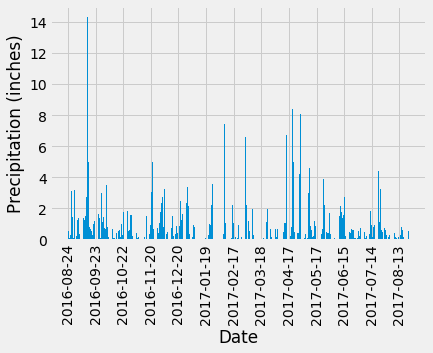

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yr_ago = (dt.strptime(recent_date.date, '%Y-%m-%d'))+relativedelta(years=-1)


# Perform a query to retrieve the data and precipitation scores
last_yr_precip = session.query(Measure).filter(Measure.date >= yr_ago).order_by((Measure.date).desc()).all()
measuredate=[]
precip=[]

for row in last_yr_precip:
    # print(row.date, row.prcp)
    measuredate.append(row.date)
    precip.append(row.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
last_yr_precip_df = pd.DataFrame({'Date': measuredate,
                                 'Precipitation':precip}).set_index('Date')            

last_yr_precip_df.sort_index(inplace=True)
clean_last_year = last_yr_precip_df.dropna()
gb=clean_last_year.groupby('Date')['Precipitation'].sum().reset_index(name='Precipitation')
print(gb)


print(min(gb['Date']))

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.bar(gb['Date'],gb['Precipitation'])
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(np.arange(0,len(gb['Date']),29.5),rotation=90)
plt.show()






In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
gb.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [89]:
# Summary statistics of data before groupby on date
clean_last_year.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()